# Establish Relations 

In [4]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader
#Import numpy for array calculation
import numpy as np

import re

#import nltk for string operations
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import relations

In [2]:
# Load the model
model = gensim.downloader.load('glove-wiki-gigaword-50')
dims = 50

In [59]:
country_capital_tuples = relations.read_relations("./relations/country-city.txt")

In [64]:
country_capital_tuples, test_tuples = country_capital_tuples[:-10], country_capital_tuples[-10:]

In [65]:
country_capital_tuples

[('Afghanistan', ' Kabul'),
 ('Albania', ' Tirana'),
 ('Algeria', ' Algiers'),
 ('Andorra', ' Andorra la Vella'),
 ('Angola', 'Luanda'),
 ('Antigua and Barbuda', ' Saint Johns'),
 ('Argentina', ' Buenos Aires'),
 ('Armenia', ' Yerevan'),
 ('Australia', ' Canberra'),
 ('Austria', ' Vienna'),
 ('Azerbaijan', ' Baku'),
 ('Bahamas', ' Nassau'),
 ('Bahrain', ' Manama'),
 ('Bangladesh', ' Dhaka'),
 ('Barbados', ' Bridgetown'),
 ('Belarus', ' Minsk'),
 ('Belgium', ' Brussels'),
 ('Belize', 'Belmopan'),
 ('Benin', ' PortoNovo'),
 ('Bhutan', ' Thimphu'),
 ('Bolivia', ' Sucre'),
 ('Bosnia and Herzegovina', 'Sarajevo'),
 ('Botswana', ' Gaborone'),
 ('Brazil', 'Brasilia'),
 ('Brunei', 'Bandar Seri Begawan'),
 ('Bulgaria', ' Sofia'),
 ('Burkina Faso', ' Ouagadougou'),
 ('Burundi', ' Gitega'),
 ('Cabo Verde', ' Praia'),
 ('Cambodia', ' Phnom Penh'),
 ('Cameroon', ' Yaounde'),
 ('Canada', 'Ottawa'),
 ('Central African Republic', ' Bangui'),
 ('Chad', ' NDjamena'),
 ('Chile', ' Santiago'),
 ('China', 

In [19]:
# created a separate list for country-capital word vectors
country_capital_vectors = []

for tup in country_capital_tuples:
    try:
        country_vec = model.get_vector(tup[0].lower().strip())
        capital_vec = model.get_vector(tup[1].lower().strip())
        country_capital_vectors.append((country_vec, capital_vec))
    except:
        pass


## Relation Visualisation

### Reduction to 3 - dimensions

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [27]:
# Reduced dimensionality of word vectors to two

vec_3d = []
start_idx = 0
end_idx = 3
for tup in country_capital_vectors:
    vec_3d.append((tup[0][start_idx:end_idx], tup[1][start_idx:end_idx]))
vec_3d = vec_3d[:15]

In [28]:
# plot country points
x1 = np.array([a[0] for a,b in vec_3d])
y1 = np.array([a[1] for a,b in vec_3d])
z1 = np.array([a[2] for a,b in vec_3d])
#capital points
x2 = np.array([b[0] for a,b in vec_3d])
y2 = np.array([b[1] for a,b in vec_3d])
z2 = np.array([b[2] for a,b in vec_3d])

<IPython.core.display.Javascript object>


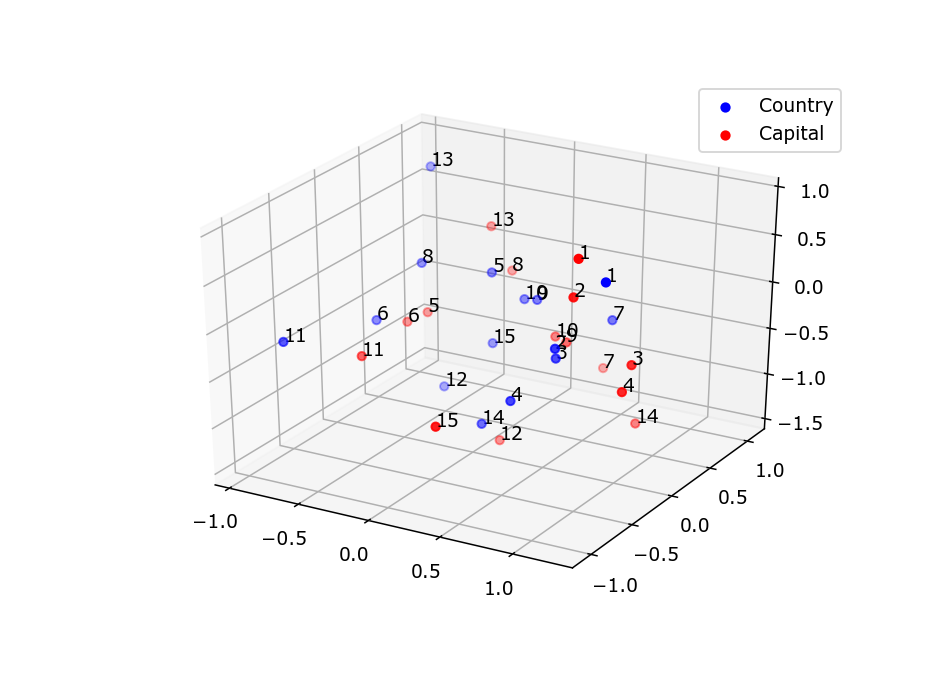

In [29]:
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue' )
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Country", "Capital"])

plt.show()

### Reduction using PCA

In [9]:
# Check if all the dimensions are on the same scale
# if yes, no need of standardization
model.get_vector("earth")

array([ 1.0828   ,  0.8278   ,  1.0101   ,  0.012863 ,  0.8429   ,
       -0.27394  , -0.0047314, -0.47085  ,  0.33517  ,  0.042372 ,
        0.59308  ,  0.16438  ,  0.28729  ,  1.2204   , -0.034446 ,
        0.77297  ,  0.70817  ,  0.502    , -1.373    , -0.29783  ,
       -0.21993  ,  0.27519  ,  0.89638  , -0.73123  ,  1.439    ,
       -0.61846  , -0.90979  ,  0.28174  ,  0.79897  ,  0.21661  ,
        2.5256   , -0.54832  , -0.66141  , -0.94656  , -0.79848  ,
       -0.083708 , -0.44645  , -0.088577 ,  0.1127   ,  0.15461  ,
       -0.41408  , -0.47965  ,  0.22811  , -0.025582 , -0.58716  ,
        0.34786  ,  0.57678  , -1.2095   , -0.60164  , -0.89549  ],
      dtype=float32)

In [33]:
# creating a separate list of country & capital vectors
country_vecs, capital_vecs = [], []

for country_vec, capital_vec in country_capital_vectors:
    country_vecs.append(country_vec)
    capital_vecs.append(capital_vec)

In [11]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca_dims_country = pca1.fit_transform(country_vecs)
pca2 = PCA()
pca_dims_capital = pca2.fit_transform(capital_vecs)

In [12]:
print("Variance in country pca vectors:")
print(pca1.explained_variance_ratio_)
print("Variance in capital pca vectors:")
print(pca2.explained_variance_ratio_)

Variance in country pca vectors:
[2.43735345e-01 2.01706234e-01 1.60144937e-01 1.08363583e-01
 6.30007974e-02 4.60309688e-02 4.23814590e-02 2.91882733e-02
 2.44798877e-02 1.98943250e-02 1.95382025e-02 1.35636167e-02
 1.32061945e-02 8.37860714e-03 4.35182132e-03 2.03574658e-03
 5.60450096e-33]
Variance in capital pca vectors:
[2.36756686e-01 1.72126022e-01 1.31975534e-01 1.07049886e-01
 7.90282417e-02 5.65134597e-02 4.83561533e-02 3.75125791e-02
 2.71616927e-02 2.41236542e-02 2.26944770e-02 1.78743836e-02
 1.64410180e-02 1.03739003e-02 6.52140713e-03 5.49090486e-03
 4.80256538e-33]


Even after applying PCA, there are 15 dimensions, most of the variance is explained by the first 4 variables. Visualisation will be easier with the first 3 variables, which together explain ~ 64% variance in country vectors

In [13]:
# country points
x1 = np.array([a[0] for a in pca_dims_country])
y1 = np.array([a[1] for a in pca_dims_country])
z1 = np.array([a[2] for a in pca_dims_country])
# capital points
x2 = np.array([a[0] for a in pca_dims_capital])
y2 = np.array([a[1] for a in pca_dims_capital])
z2 = np.array([a[2] for a in pca_dims_capital])

<IPython.core.display.Javascript object>


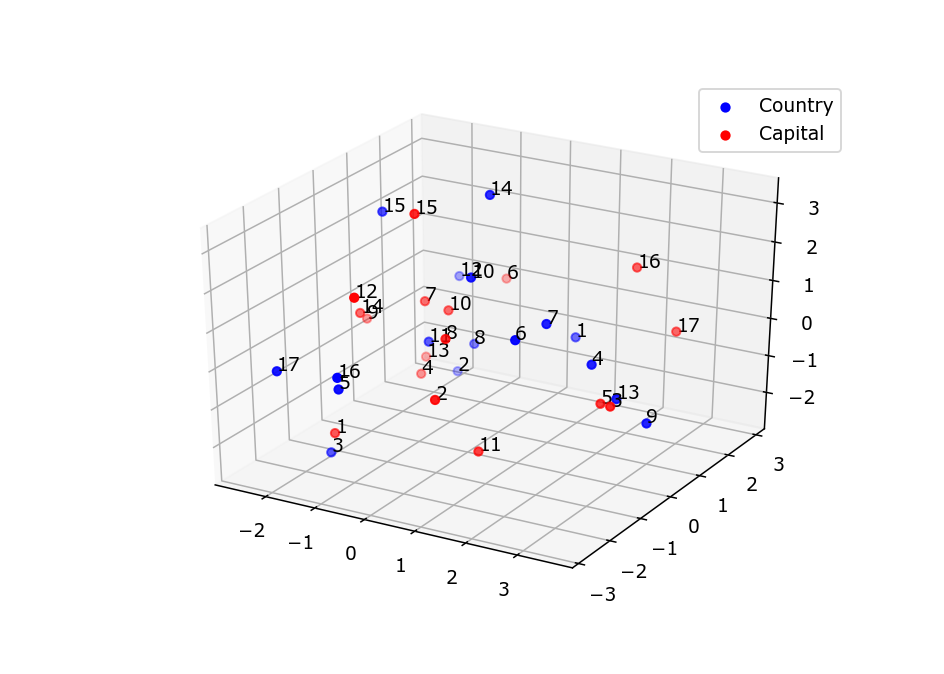

In [14]:
# 3d plotting of the points
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue' )
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Country", "Capital"])


plt.show()

PCA doesn't work and gives really bad results

## Multivariate Multiple Linear Regression

Since we want to establish a relationship between each country vector and capital vector with each vector having 50 dimensions, we'll have to regress separately on each dimension of the dependent variable.

In [30]:
from sklearn.linear_model import LinearRegression

In [35]:
model.get_vector("india") # y1 = ax + bx2 + cx3 + c

array([-0.20356 , -0.8707  , -0.19172 ,  0.73862 ,  0.18494 ,  0.14926 ,
        0.48079 , -0.21633 ,  0.72753 , -0.36912 ,  0.13397 , -0.1143  ,
       -0.18075 , -0.64683 , -0.18484 ,  0.83575 ,  0.48179 ,  0.76026 ,
       -0.50381 ,  0.80743 ,  1.2195  ,  0.3459  ,  0.22185 ,  0.31335 ,
        1.2066  , -1.8441  ,  0.14064 , -0.99715 , -1.1402  ,  0.32342 ,
        3.2128  ,  0.42708 ,  0.19504 ,  0.80113 ,  0.38555 , -0.12568 ,
       -0.26533 ,  0.055264, -1.1557  ,  0.16836 , -0.82228 ,  0.20394 ,
        0.089235, -0.60125 , -0.032878,  1.3735  , -0.51661 ,  0.29611 ,
        0.23951 , -1.3801  ], dtype=float32)

In [36]:
# create a coefficients array
coeff = []
intercepts = []
avg_score = 0
# regressing a linear model on each independent dimension of response variable
for i in range(dims):
    y = [x[i] for x in country_vecs]
    x = capital_vecs
    regr = LinearRegression()
    regr.fit(x, y)
    coeff.append(regr.coef_)
    intercepts.append(regr.intercept_)
    avg_score += regr.score(x,y)
print("Model score: ", avg_score/dims)

Model score:  0.7885459615812844


Each list in coeff represent the coefficients of that particular dimension

In [37]:
# Predicting country vectors from the coefficients
country_vecs_pred = []
for cap_vec in capital_vecs:
    country_vec = []
    for i in range(dims):
        country_vec.append(sum([a*b for a,b in zip(cap_vec,coeff[i])]) + intercepts[i])
    country_vecs_pred.append(np.array(country_vec))

Plotting the predicted and actual values in 3d space

<IPython.core.display.Javascript object>


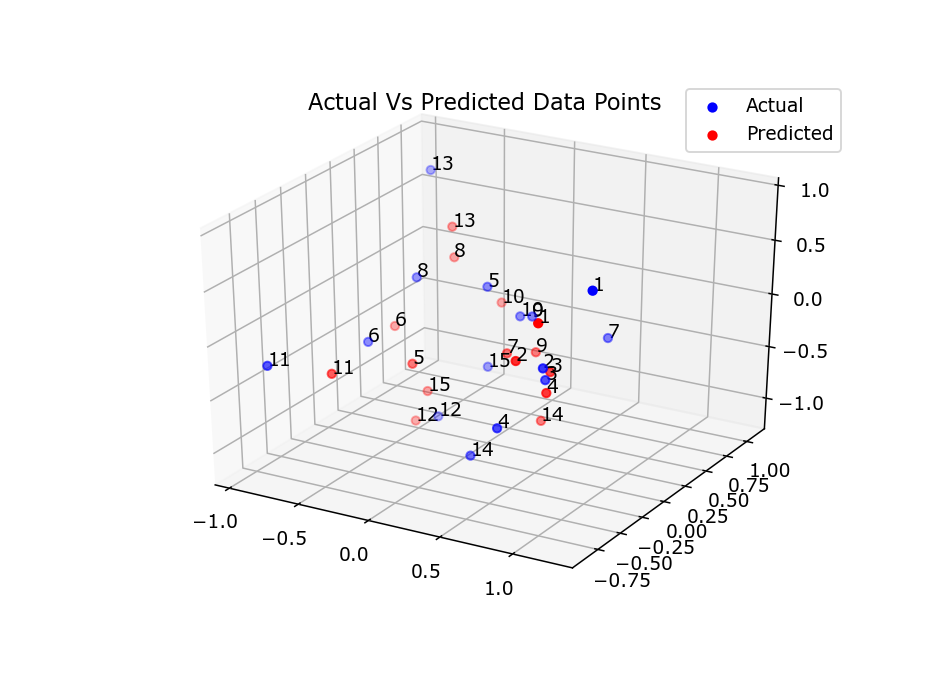

In [39]:
# actual points
x1 = np.array([a[0] for a in country_vecs[:15]])
y1 = np.array([a[1] for a in country_vecs[:15]])
z1 = np.array([a[2] for a in country_vecs[:15]])
# predicted points
x2 = np.array([a[0] for a in country_vecs_pred[:15]])
y2 = np.array([a[1] for a in country_vecs_pred[:15]])
z2 = np.array([a[2] for a in country_vecs_pred[:15]])

# 3d plotting of the points
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue')
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Actual", "Predicted"])

plt.title("Actual Vs Predicted Data Points")

plt.show()

The model gives an accuracy of 0.78

## Taking orthogonal projection of predicted vector to measure accuracy

In [40]:
def predict_output_vector(capital):
    country_vec = []
    cap_vec = model.get_vector(capital)
    for i in range(dims):
        country_vec.append(sum([a*b for a,b in zip(cap_vec,coeff[i])]) + intercepts[i])
    return np.array(country_vec)

In [41]:
def calculate_accuracy(true_vector, predicted_vector):
    true_vector_norm = np.sqrt(sum(true_vector**2))    
    proj_of_u_on_v = (np.dot(predicted_vector, true_vector)/true_vector_norm**2)*true_vector
    return 1 - abs(np.linalg.norm(proj_of_u_on_v - true_vector)/np.linalg.norm(true_vector))

In [66]:
def run_test(country, capital):
    country = country.lower().strip()
    capital = capital.lower().strip()
    true_country_vector = model.get_vector(country)
    predicted_country_vector = predict_output_vector(capital)
    return calculate_accuracy(true_country_vector, predicted_country_vector)

In [67]:
# test 1
run_test("india", "delhi")

0.8721173256635666

In [68]:
# test 2
run_test("india", "apple")

0.4132007360458374

In [69]:
# test 3
run_test("india", "paris")

0.4130839705467224

In [70]:
# test 4 -- pair not in the database -> model overfitting
run_test("france", "paris")

0.8432103991508484

In [71]:
# test 5
run_test("canada", "ottawa")

0.9205109998583794

In [78]:
run_test(test_tuples[4][0], "delhi")

0.5008938014507294

In [76]:
test_tuples

[('Tonga', ' Nukualofa'),
 ('Trinidad and Tobago', ' Port of Spain'),
 ('Tunisia', ' Tunis'),
 ('Turkey', ' Ankara'),
 ('Turkmenistan', ' Ashgabat'),
 ('Tuvalu', ' Funafuti'),
 ('Uganda', 'Kampala'),
 ('Ukraine', ' Kyiv'),
 ('United Arab Emirates', ' Abu Dhabi'),
 ('United Kingdom', ' London')]

In [77]:
country_capital_tuples

[('Afghanistan', ' Kabul'),
 ('Albania', ' Tirana'),
 ('Algeria', ' Algiers'),
 ('Andorra', ' Andorra la Vella'),
 ('Angola', 'Luanda'),
 ('Antigua and Barbuda', ' Saint Johns'),
 ('Argentina', ' Buenos Aires'),
 ('Armenia', ' Yerevan'),
 ('Australia', ' Canberra'),
 ('Austria', ' Vienna'),
 ('Azerbaijan', ' Baku'),
 ('Bahamas', ' Nassau'),
 ('Bahrain', ' Manama'),
 ('Bangladesh', ' Dhaka'),
 ('Barbados', ' Bridgetown'),
 ('Belarus', ' Minsk'),
 ('Belgium', ' Brussels'),
 ('Belize', 'Belmopan'),
 ('Benin', ' PortoNovo'),
 ('Bhutan', ' Thimphu'),
 ('Bolivia', ' Sucre'),
 ('Bosnia and Herzegovina', 'Sarajevo'),
 ('Botswana', ' Gaborone'),
 ('Brazil', 'Brasilia'),
 ('Brunei', 'Bandar Seri Begawan'),
 ('Bulgaria', ' Sofia'),
 ('Burkina Faso', ' Ouagadougou'),
 ('Burundi', ' Gitega'),
 ('Cabo Verde', ' Praia'),
 ('Cambodia', ' Phnom Penh'),
 ('Cameroon', ' Yaounde'),
 ('Canada', 'Ottawa'),
 ('Central African Republic', ' Bangui'),
 ('Chad', ' NDjamena'),
 ('Chile', ' Santiago'),
 ('China', 